# A simple plot wit

This is plain text

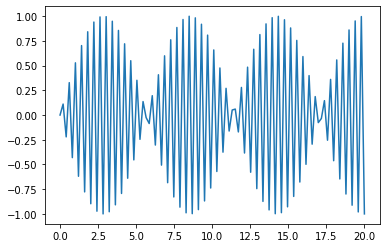

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
p = np.linspace(0,20,100)
plt.plot(p,np.sin(15*p))
plt.show()

# A cluster map with Seaborn

In [ ]:
import pandas as pd
import seaborn as sns
sns.set()

# Load the brain networks example dataset
df = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)

# Select a subset of the networks
used_networks = [1, 5, 6, 7, 8, 12, 13, 17]
used_columns = (df.columns.get_level_values("network")
                              .astype(int)
                              .isin(used_networks))
df = df.loc[:, used_columns]

# Create a categorical palette to identify the networks
network_pal = sns.husl_palette(8, s=.45)
network_lut = dict(zip(map(str, used_networks), network_pal))
    
# Convert the palette to vectors that will be drawn on the side of the matrix
networks = df.columns.get_level_values("network")
network_colors = pd.Series(networks, index=df.columns).map(network_lut)
    
    # Draw the full plot
sns.clustermap(df.corr(), center=0, cmap="vlag",
                   row_colors=network_colors, col_colors=network_colors,
                   linewidths=.75, figsize=(13, 13))

# A choropleth map with Altair

In [ ]:
import altair as alt
from vega_datasets import data

states = alt.topo_feature(data.us_10m.url, 'states')
source = data.population_engineers_hurricanes.url
variable_list = ['population', 'engineers', 'hurricanes']

alt.Chart(states).mark_geoshape().encode(
    alt.Color(alt.repeat('row'), type='quantitative')
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(source, 'id', variable_list)
).properties(
    width=500,
    height=300
).project(
    type='albersUsa'
).repeat(
    row=variable_list
).resolve_scale(
    color='independent'
)

# Hexbin with Bokeh
## Mouse hover to see value

In [ ]:
import numpy as np

from bokeh.io import output_notebook, show
from bokeh.models import HoverTool
from bokeh.plotting import figure

n = 500
x = 2 + 2*np.random.standard_normal(n)
y = 2 + 2*np.random.standard_normal(n)

p = figure(title="Hexbin for 500 points", match_aspect=True,
           tools="wheel_zoom,reset", background_fill_color='#440154')
p.grid.visible = False

r, bins = p.hexbin(x, y, size=0.5, hover_color="pink", hover_alpha=0.8)

p.circle(x, y, color="white", size=1)

p.add_tools(HoverTool(
    tooltips=[("count", "@c"), ("(q,r)", "(@q, @r)")],
    mode="mouse", point_policy="follow_mouse", renderers=[r]
))

output_notebook()

show(p)

In [ ]:
# 3D surface plots with Plotly
## Mouse drag to rotate, mouse wheel to zoom in/out

# Equation of ring cyclide

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

a, b, d = 1.32, 1., 0.8
c = a**2 - b**2
u, v = np.mgrid[0:2*np.pi:100j, 0:2*np.pi:100j]
x = (d * (c - a * np.cos(u) * np.cos(v)) + b**2 * np.cos(u)) / (a - c * np.cos(u) * np.cos(v))
y = b * np.sin(u) * (a - d*np.cos(v)) / (a - c * np.cos(u) * np.cos(v))
z = b * np.sin(v) * (c*np.cos(u) - d) / (a - c * np.cos(u) * np.cos(v))

fig = make_subplots(rows=1, cols=2,
                    specs=[[{'is_3d': True}, {'is_3d': True}]],
                    subplot_titles=['Color corresponds to z', 'Color corresponds to distance to origin'],
                    )

fig.add_trace(go.Surface(x=x, y=y, z=z, colorbar_x=-0.07), 1, 1)
fig.add_trace(go.Surface(x=x, y=y, z=z, surfacecolor=x**2 + y**2 + z**2), 1, 2)
fig.update_layout(title_text="Ring cyclide")
fig.show()

# View molecular structures using widget nglview
## Mouse drag to rotate, mouse wheel to zoom in/out

In [ ]:
import nglview
view = nglview.show_pdbid("3pqr")  # load "3pqr" from RCSB PDB and display viewer widget
view


# Interactive map using iPyLeaflet
## Use your mouse to drag the map around

In [ ]:
from ipyleaflet import (
    Map,
    Marker, MarkerCluster,
    TileLayer, ImageOverlay,
    Polyline, Polygon, Rectangle, Circle, CircleMarker,
    Popup,
    GeoJSON,
    DrawControl,
    basemaps
)
from ipyleaflet.leaflet import Heatmap
from ipywidgets import HTML
from random import uniform
import time
center = (52.204793, 360.121558)

m = Map(center=center, zoom=15)

marker = Marker(location=center, draggable=True)
m.add_layer(marker);

display(m)

# Zoom in/out a map using a slider
## Use the slider below to zoom the map 

In [ ]:
def create_random_data(length):
    "Return a list of some random lat/lon/value triples."
    return [[uniform(-80, 80), 
             uniform(-180, 180), 
             uniform(0, 1000)] for i in range(length)]

In [ ]:
m = Map(center=[0, 0], zoom=2)
heat = Heatmap(locations=create_random_data(1000), radius=20, blur=10)
m.add_layer(heat)
m.interact(zoom=(2,10,.25))

# Draw your own dataset
## Use your mouse to draw your own dataset in a scatter chart on the surface below! 

In [ ]:
from drawdata import draw_scatter

draw_scatter()